# ML PK

## Data imported from '/Data/parkinsons.data/'

### Citation:

'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

### Source: 

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments, please contact Max 
Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this 
dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering (to appear).

## Data imported from '/Data/parkinsons_updrs.data/'

### Citation:
A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson.s disease progression by non-invasive 
speech tests',
IEEE Transactions on Biomedical Engineering (to appear). 

### Source:

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com) 
and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in 
collaboration with 10 medical centers in the US and Intel Corporation who 
developed the telemonitoring device to record the speech signals. The 
original study used a range of linear and nonlinear regression methods to 
predict the clinician's Parkinson's disease symptom score on the UPDRS scale.

### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progression monitoring. The 
recordings were automatically captured in the patient's homes.

Columns in the table contain subject number, subject age, subject gender, 
time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 
16 biomedical voice measures. Each row corresponds to one of 5,875 voice 
recording from these individuals. The main aim of the data is to predict the 
motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 
voice measures.

The data is in ASCII CSV format. The rows of the CSV file contain an instance 
corresponding to one voice recording. There are around 200 recordings per 
patient, the subject number of the patient is identified in the first column. 
For further information or to pass on comments, please contact Athanasios 
Tsanas (tsanasthanasis '@' gmail.com) or Max Little (littlem '@' 
physics.ox.ac.uk).

Further details are contained in the following reference -- if you use this 
dataset, please cite:
Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),
'Accurate telemonitoring of Parkinson.s disease progression by non-invasive 
speech tests',
IEEE Transactions on Biomedical Engineering (to appear).

Further details about the biomedical voice measures can be found in:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009),
'Suitability of dysphonia measurements for telemonitoring of Parkinson's 
disease',
IEEE Transactions on Biomedical Engineering, 56(4):1015-1022 

In [52]:
# Import Dependencies

# Import pandas and numpy
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import sklearn dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Read CSV files into dataframes

# File paths
file1_path = 'Data\parkinsons.data'
file2_path = 'Data\parkinsons_updrs.data'


# Using pd.read_csv() method to read the data into a pandas dataframe
classification_df = pd.read_csv(file1_path)
prediction_df = pd.read_csv(file2_path)


In [3]:
# Review df2
classification_df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


Parkinsons Disease Classification DF:

Attribute/Column information:
* Matrix column entries (attributes):
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
* measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [4]:
# Review df1
prediction_df.head(10)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


Parkinsons Disease Prediction DF:

Attribute/Column information:

* subject# - Integer that uniquely identifies each subject
* age - Subject age
* sex - Subject gender '0' - male, '1' - female
* test_time - Time since recruitment into the trial. The integer part is the 
* number of days since recruitment.
* motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
* total_UPDRS - Clinician's total UPDRS score, linearly interpolated
* Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of 
* variation in fundamental frequency
* Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - 
* Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* RPDE - A nonlinear dynamical complexity measure
* DFA - Signal fractal scaling exponent
* PPE - A nonlinear measure of fundamental frequency variation 

In [6]:
# Rename the column names in the classification_df so as to remove the 'MDVP' prefix
classification_df = classification_df.rename(columns={
    'MDVP:Fo(Hz)': 'Fo(Hz)',
    'MDVP:Fhi(Hz)': 'Fhi(Hz)',
    'MDVP:Flo(Hz)': 'Flo(Hz)',
    'MDVP:Jitter(%)': 'Jitter(%)',
    'MDVP:Jitter(Abs)': 'Jitter(Abs)',
    'MDVP:RAP': 'RAP',
    'MDVP:PPQ': 'PPQ',
    'Jitter:DDP': 'Jitter:DDP',
    'MDVP:Shimmer': 'Shimmer',
    'MDVP:Shimmer(dB)': 'Shimmer(dB)',
    'Shimmer:APQ3': 'Shimmer:APQ3',
    'Shimmer:APQ5': 'Shimmer:APQ5',
    'MDVP:APQ': 'APQ',
    'Shimmer:DDA': 'Shimmer:DDA',
    'NHR': 'NHR',
    'HNR': 'HNR',
    'RPDE': 'RPDE',
    'DFA': 'DFA',
    'spread1': 'spread1',
    'spread2': 'spread2',
    'D2': 'D2',
    'PPE': 'PPE'
})

### Creating Covariance Matrices for the datasets

In [45]:
# Create a function that will create a covariance matrix visualization with a dataframe as an input
def covariance_matrix(name, data, columns):
    # Calculate correlation
    corr = data[columns].corr()

    # Create a heatmap using seaborn
    plt.figure(figsize=(12, 10))
    sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
    sns.heatmap(corr, center=0, linewidths=0.5)
    plt.title(f'{name} Correlation Matrix')
    plt.show()

In [34]:
# Review classification_df
classification_df.head(10)

,name,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [11]:
# Computer how many overlapping columns, and how many unique columns there are in each dataframe, then create and display a table with that data
# Create a list of the columns in each dataframe
classification_columns = classification_df.columns
prediction_columns = prediction_df.columns

# Create a list of the overlapping columns
overlapping_columns = []
for column in classification_columns:
    if column in prediction_columns:
        overlapping_columns.append(column)

# Create a list of the unique columns in each dataframe
unique_classification_columns = []
for column in classification_columns:
    if column not in prediction_columns:
        unique_classification_columns.append(column)

unique_prediction_columns = []
for column in prediction_columns:
    if column not in classification_columns:
        unique_prediction_columns.append(column)

# Get the length of the longest list
max_length = max(len(overlapping_columns), len(unique_classification_columns), len(unique_prediction_columns))

# Pad the shorter lists with np.nan, so that all arrays in the dataframe we create will be of the same length (pandas restriction)
overlapping_columns = overlapping_columns + [np.nan]*(max_length - len(overlapping_columns))
unique_classification_columns = unique_classification_columns + [np.nan]*(max_length - len(unique_classification_columns))
unique_prediction_columns = unique_prediction_columns + [np.nan]*(max_length - len(unique_prediction_columns))

# Create the dataframe
columns_df = pd.DataFrame({
    'Overlapping Columns': overlapping_columns,
    'Unique Columns in Classification Dataframe': unique_classification_columns,
    'Unique Columns in Prediction Dataframe': unique_prediction_columns
})

# Display the dataframe
columns_df

,Overlapping Columns,Unique Columns in Classification Dataframe,Unique Columns in Prediction Dataframe
0,Jitter(%),name,subject#
1,Jitter(Abs),Fo(Hz),age
2,Jitter:DDP,Fhi(Hz),sex
3,Shimmer,Flo(Hz),test_time
4,Shimmer(dB),RAP,motor_UPDRS
5,Shimmer:APQ3,PPQ,total_UPDRS
6,Shimmer:APQ5,APQ,Jitter:RAP
7,Shimmer:DDA,status,Jitter:PPQ5
8,NHR,spread1,Shimmer:APQ11
9,HNR,spread2,NaN


In [25]:
# Create a clean_classification_df and clean_prediction_df that only contain the overlapping columns
clean_classification_df = classification_df[overlapping_columns]
clean_prediction_df = prediction_df[overlapping_columns]

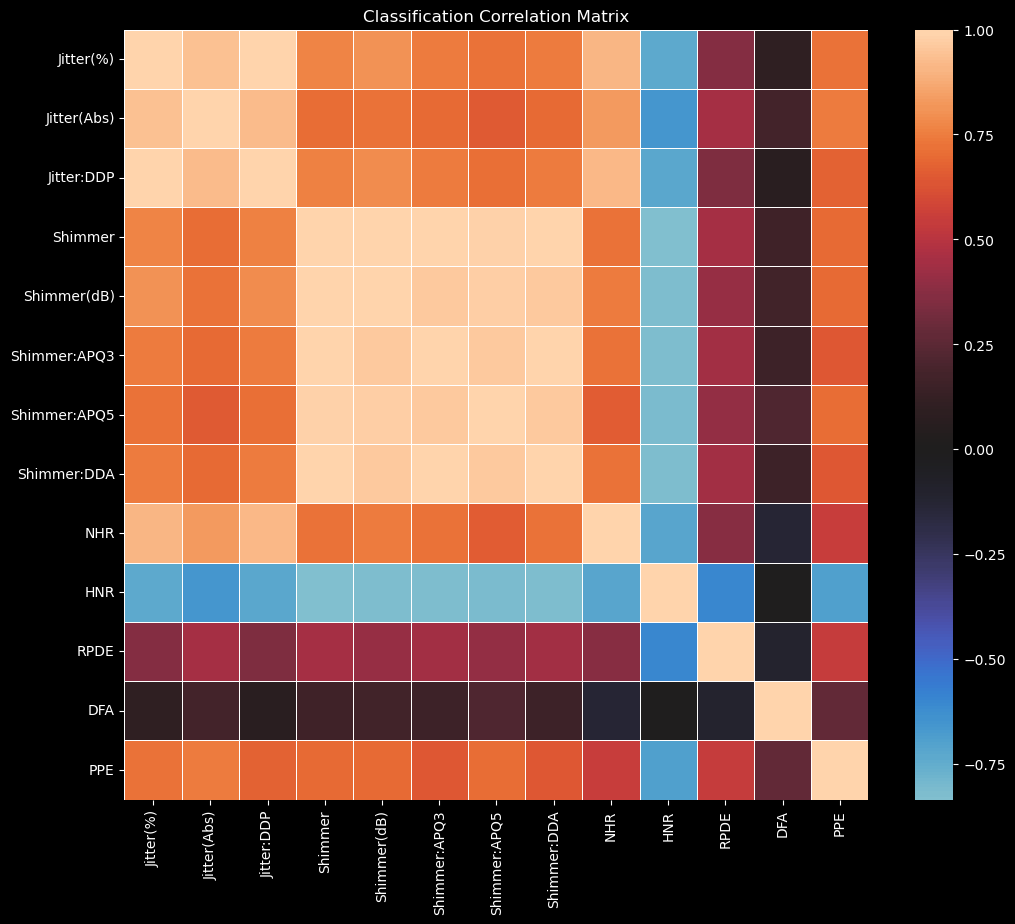

In [46]:
# Create a covariance matrix visualization for the clean_classification_df
covariance_matrix('Classification', clean_classification_df, overlapping_columns)

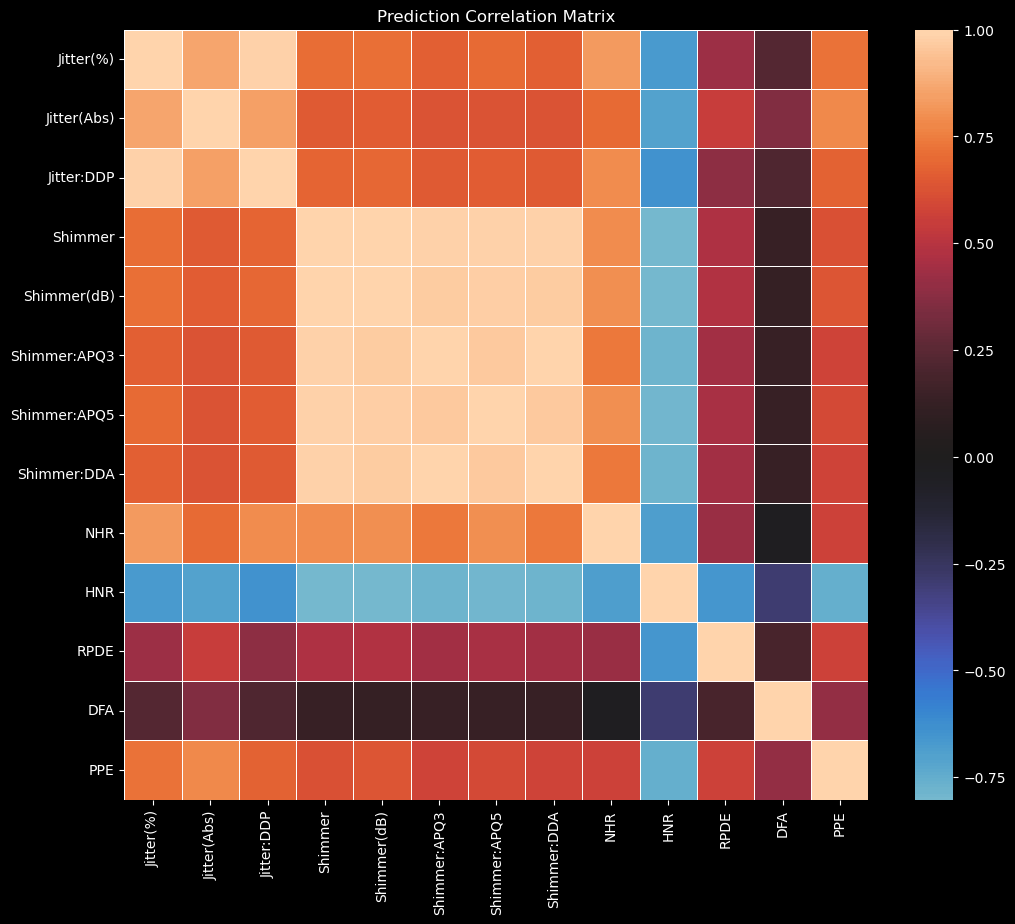

In [47]:
# Create a covariance matrix visualization for the clean_prediction_df
covariance_matrix('Prediction', clean_prediction_df, overlapping_columns)

In [16]:
# Create a new dataframe called merged_df, which contains the data from the classification_df and prediction_df rows for the columns in the overlapping_columns list
merged_df = pd.DataFrame()

# Add the overlapping columns to the merged_df
for column in overlapping_columns:
    merged_df[column] = classification_df[column]

# Add the classification_df columns that are in the overlapping_columns list to the merged_df
for column in overlapping_columns:
    merged_df[column] = classification_df[column]

# Add the prediction_df columns that are in the overlapping_columns list to the merged_df
for column in overlapping_columns:
    merged_df[column] = prediction_df[column]

# Display the merged_df, as well as a total row count
merged_df.head(10)


,Jitter(%),Jitter(Abs),Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.00662,0.000034,0.01204,0.02565,0.230,0.01438,0.01309,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,0.00300,0.000017,0.00395,0.02024,0.179,0.00994,0.01072,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,0.00481,0.000025,0.00616,0.01675,0.181,0.00734,0.00844,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,0.00528,0.000027,0.00573,0.02309,0.327,0.01106,0.01265,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,0.00335,0.000020,0.00278,0.01703,0.176,0.00679,0.00929,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,0.00353,0.000023,0.00357,0.02227,0.214,0.01006,0.01337,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,0.00422,0.000024,0.00637,0.04352,0.445,0.02376,0.02621,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,0.00476,0.000025,0.00678,0.02191,0.212,0.00979,0.01462,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,0.00432,0.000029,0.00468,0.04296,0.371,0.01774,0.02134,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,0.00496,0.000027,0.00773,0.03610,0.310,0.02030,0.01970,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


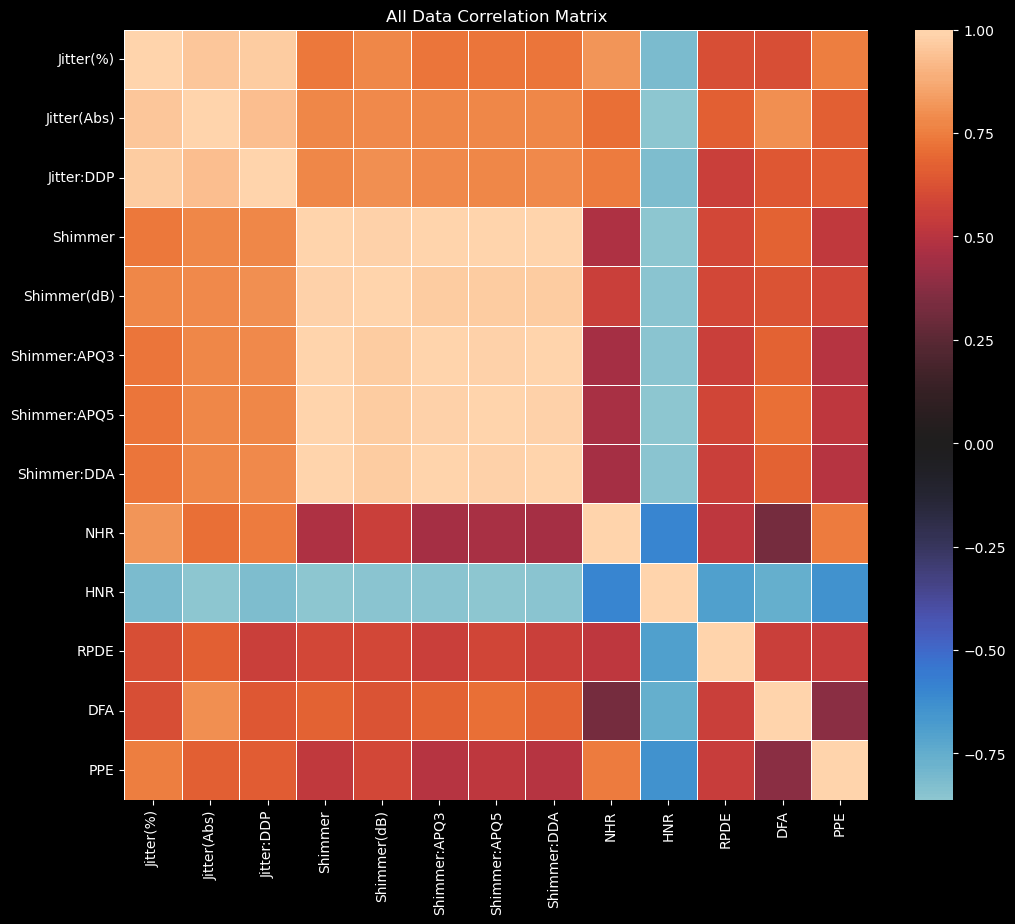

In [48]:
# Create a covariance matrix for the merged_df
covariance_matrix('All Data', merged_df, overlapping_columns)

In [55]:
merged_df.corr()

,Jitter(%),Jitter(Abs),Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
Jitter(%),1.000000,0.949781,0.967457,0.734844,0.781007,0.729043,0.726467,0.729047,0.816153,-0.814239,0.612882,0.613457,0.747429
Jitter(Abs),0.949781,1.000000,0.928629,0.775325,0.784794,0.768474,0.780480,0.768487,0.715724,-0.861365,0.666557,0.799215,0.670735
Jitter:DDP,0.967457,0.928629,1.000000,0.773626,0.802037,0.783584,0.768703,0.783586,0.741143,-0.823548,0.562024,0.642124,0.656149
Shimmer,0.734844,0.775325,0.773626,1.000000,0.980113,0.991260,0.991050,0.991258,0.471564,-0.857534,0.585821,0.680058,0.525127
Shimmer(dB),0.781007,0.784794,0.802037,0.980113,1.000000,0.966802,0.967874,0.966794,0.554138,-0.849405,0.587395,0.628555,0.588844
Shimmer:APQ3,0.729043,0.768474,0.783584,0.991260,0.966802,1.000000,0.981827,1.000000,0.454024,-0.849597,0.551684,0.679598,0.491224
Shimmer:APQ5,0.726467,0.780480,0.768703,0.991050,0.967874,0.981827,1.000000,0.981821,0.461857,-0.854607,0.583590,0.710626,0.517827
Shimmer:DDA,0.729047,0.768487,0.783586,0.991258,0.966794,1.000000,0.981821,1.000000,0.454017,-0.849607,0.551682,0.679619,0.491203
NHR,0.816153,0.715724,0.741143,0.471564,0.554138,0.454024,0.461857,0.454017,1.000000,-0.594016,0.517424,0.322895,0.738341
HNR,-0.814239,-0.861365,-0.823548,-0.857534,-0.849405,-0.849597,-0.854607,-0.849607,-0.594016,1.000000,-0.696508,-0.756866,-0.640124


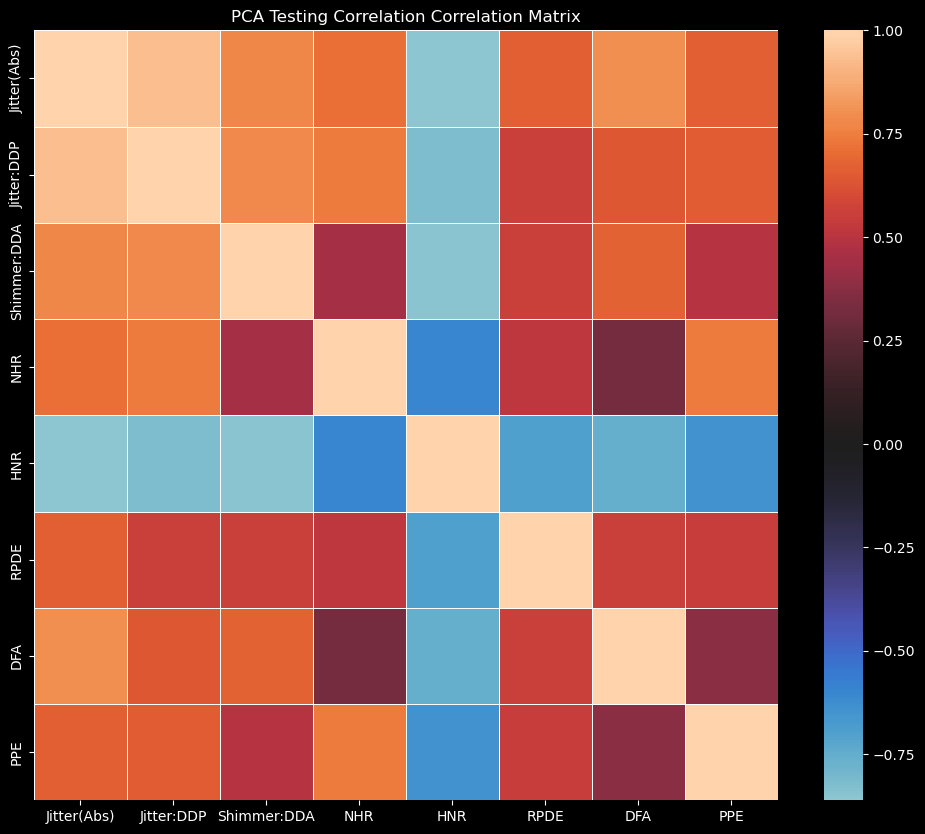

In [68]:
# Create a new dataframe for correlation that is based off of merged_df but removes the following columns:
# Jiterr(Abs), Jitter(%), Shimmer, Shimmer(dB), Shimmer(APQ3), Shimmer(APQ5)

merged_pca_test_df = merged_df.copy()

# Remove the columns
merged_pca_test_df = merged_pca_test_df.drop(columns=['Jitter(%)', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5'])

# Create a list of the columns in merged_corr_test_df
corr_columns = merged_pca_test_df.columns

# Create a covariance matrix for the merged_corr_test_df
covariance_matrix('PCA Testing Correlation', merged_pca_test_df, corr_columns)

In [71]:
# Compute PCA on the merged_pca_test_df dataframe to see if we can reduce dimensionality without losing too much information

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
merged_pca_test_df_scaled = scaler.fit_transform(merged_pca_test_df)

# Create a PCA instance
pca = PCA(n_components=0.9)

# Fit and transform the data using PCA
merged_pca_test_df_pca = pca.fit_transform(merged_pca_test_df_scaled)

# Create a dataframe with the PCA data, renaming the columns to PC1, PC2, etc.
pca_df = pd.DataFrame(
    data=merged_pca_test_df_pca,
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)

# Display the dataframe
pca_df.head(10)


,PC1,PC2,PC3,PC4
0,-0.062487,-0.352340,1.448090,0.370190
1,-2.216020,-0.666500,0.272627,-0.088440
2,-0.717376,0.545880,0.037663,0.098703
3,0.303075,1.557739,-0.335776,0.220553
4,-1.669197,0.088450,-0.509784,-0.028260
5,-0.739287,-0.321022,-1.250479,0.429979
6,-0.174523,-0.624031,0.096957,1.381702
7,-0.168436,1.008511,-0.003077,0.247646
8,0.056208,-0.685968,-0.573116,0.551319
9,0.293965,-0.320064,0.037237,0.803233


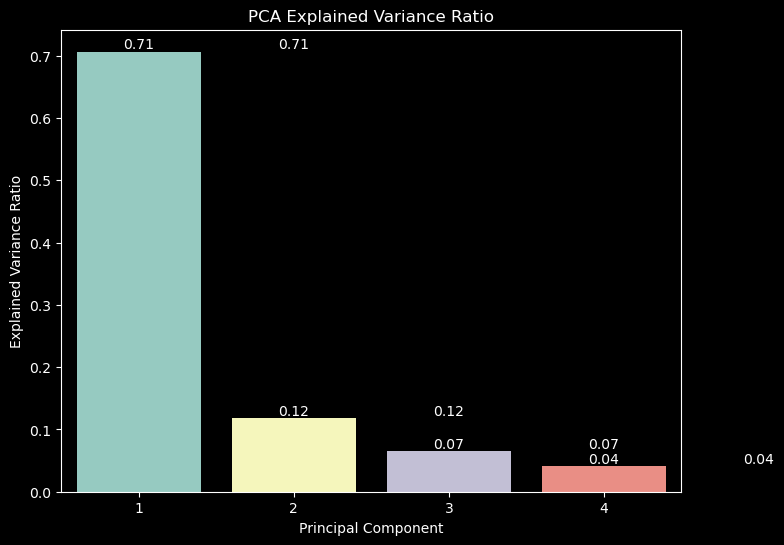

In [74]:
# Create a barplot of the explained variance ratio using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    x=list(range(1, len(explained_variance_ratio)+1)),
    y=explained_variance_ratio
)
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Add values to the bars
for i, ratio in enumerate(explained_variance_ratio):
    plt.text(i+1, ratio, f'{ratio:.2f}', ha='center', va='bottom')

# Center the values on each bar
for rect in plt.gca().patches:
    plt.gca().annotate(f'{rect.get_height():.2f}', (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom')

plt.show()
